# Chapter 4 - Inferences with Gaussians

In [1]:
import pyjags
from pjbcmassistant import model_handler
from pjbcmassistant import sample_handler


## 4.1 - Inferring a mean and standard deviation

In [2]:
spec = """
model:
Gaussian.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [1.1, 1.9, 2.3, 1.8]
n = len(x) 

sample:
mu
lambda
sigma

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.definition())
samples = model.sample(**modelbuddy.sample_rules())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [3]:
samplebuddy.summary()

,mean,std dev,median,mode,HPD,95CI
lambda,2.533463,2.687994,1.719483,14.462543,"[0.011, 10.293]","[0.063, 9.916]"
mu,1.776506,0.753637,1.773232,-4.491137,"[-0.432, 3.484]","[0.317, 3.257]"
sigma,1.100051,1.017108,0.762607,4.205046,"[0.213, 4.938]","[0.318, 3.983]"


all PSRF values < 1.05 | maximum PSRF: sigma at 1.0106699346847192.


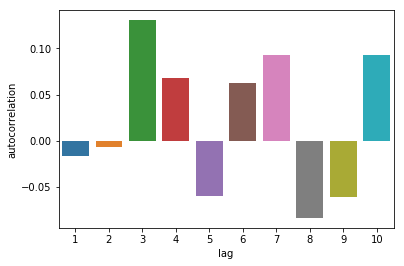

In [4]:
samplebuddy.diagnostic()
samplebuddy.autocorr('mu')

/home/isaiah/anaconda3/envs/pyjagsBCM/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


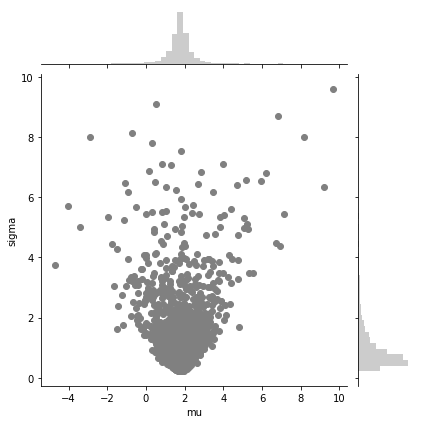

In [5]:
samplebuddy.vizjoint('mu','sigma')

## 4.2 - The Seven Scientists

In [6]:
spec = """
model:
SevenScientists.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [-27.020,3.570,8.191,9.898,9.603,9.945,10.056]
n = len(x)

sample:
mu
sigma

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.definition())
samples = model.sample(**modelbuddy.sample_rules())

samplebuddy = sample_handler(samples)

sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [7]:
samplebuddy.summary()

,mean,std dev,median,mode,HPD,95CI
mu,9.903574,0.253682,9.927883,4.070285,"[9.559, 10.165]","[9.573, 10.112]"
sigma_0,237.294130,2162.677086,54.818687,6962.546792,"[10.079, 582.635]","[15.76, 1093.279]"
sigma_1,37.074196,194.359461,9.342437,796.455341,"[0.411, 110.21]","[2.788, 177.493]"
sigma_2,12.544358,121.757818,2.511472,380.909505,"[0.391, 27.252]","[0.754, 56.08]"
sigma_3,1.164972,26.408313,0.140380,49.892588,"[0.014, 2.864]","[0.028, 3.706]"
sigma_4,2.834253,51.664858,0.446587,122.272775,"[0.019, 5.453]","[0.07, 8.846]"
sigma_5,0.798937,6.119722,0.126195,25.995821,"[0.014, 2.516]","[0.026, 4.486]"
sigma_6,1.226141,10.627379,0.215691,38.153976,"[0.015, 3.156]","[0.035, 6.208]"


all PSRF values < 1.05 | maximum PSRF: mu at 1.0050123790680927.


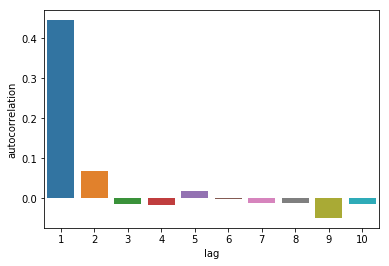

In [8]:
samplebuddy.diagnostic()
samplebuddy.autocorr('mu')

## 4.3 - Repeated measurement of IQ

In [9]:
spec = """
model:
IQ.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [[90,95,100],[105,110,115],[150,155,160]]
n, m = np.shape(x)

# this is an ugly way to do this, because we're "calling" a
# module (numpy) that we haven't actually imported... I'm sure there's
# a smart alternative, but I won't dwell on it just yet.

sample:
mu
sigma

"""

modelbuddy = model_handler(spec)

# modelbuddy.data['x'] = [[90,95,100],[105,110,115],[150,155,160]]

model = pyjags.Model(**modelbuddy.definition())
samples = model.sample(**modelbuddy.sample_rules())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [10]:
samplebuddy.summary()

,mean,std dev,median,mode,HPD,95CI
mu_0,95.039598,4.393774,95.080306,73.236811,"[80.958, 108.37]","[86.165, 104.088]"
mu_1,110.080142,4.105273,110.053117,89.753459,"[97.529, 120.455]","[101.721, 118.677]"
mu_2,154.877437,4.229356,154.975338,131.518498,"[131.211, 166.653]","[145.661, 163.198]"
sigma,6.667034,2.912667,5.919164,19.055212,"[2.847, 15.592]","[3.503, 14.403]"


all PSRF values < 1.05 | maximum PSRF: sigma at 1.0019029027827269.


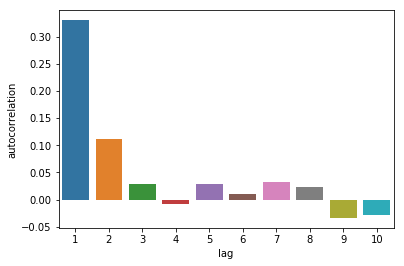

In [11]:
samplebuddy.diagnostic()
samplebuddy.autocorr('mu_1')